# MLP implementation on MNIST dataset

This notebook show comparison between tensorflow implemented MLP for clasification of numbers from MNIST dataset in comparison to self implemented classes to build MLP and classificate numbers.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Tensorflow model

In [2]:
mnist = tf.keras.datasets.mnist # imgaes of handwritten digits

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train= tf.keras.utils.normalize(x_train, axis=1) 
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten()) #input
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu)) #hidden layer 1
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output probability function softmax


model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6863 - accuracy: 0.8231 - val_loss: 0.2446 - val_accuracy: 0.9297
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2273 - accuracy: 0.9343 - val_loss: 0.1958 - val_accuracy: 0.9434
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1844 - accuracy: 0.9459 - val_loss: 0.1704 - val_accuracy: 0.9502



## Self-implemented model

Classes for the model are implemented in `classes.py`

In [4]:
from classes import *
import numpy as np

In [5]:
def create_matrix(y):
    data = np.zeros((len(y), 10))
    for n,i in enumerate(y):
        data[n][i]=1
    return data

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [7]:
y_train_m = create_matrix(y_train)

In [8]:
y_test_m = create_matrix(y_test)

In [9]:
X, y = x_train, y_train_m
X_v, y_v = x_test, y_test_m

dense1 = Layer_Dense(784, 32)
activation1 = Acti_Relu()


dense2 = Layer_Dense(32, 10)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() # combination of softmax and loss


optimizer = Optimizer_Adam(learning_rate=0.07, decay=5e-7)

# Train in loop
for epoch in range(31):
    
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    # Validation data
    
    dense1.forward(X_v)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    val_loss = loss_activation.forward(dense2.output, y_v)
    
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_v.shape) == 2:
        y_v = np.argmax(y_v, axis=1)
    accuracy = np.mean(predictions==y_v)
    
    if not epoch % 10:
        print('validation: ' + f'acc: {accuracy:.3f}, ' + f'loss: {val_loss:.3f}')

epoch: 0, acc: 0.142, loss: 2.302, lr: 0.070
validation: acc: 0.253, loss: 2.144
epoch: 10, acc: 0.857, loss: 0.487, lr: 0.070
validation: acc: 0.875, loss: 0.445
epoch: 20, acc: 0.908, loss: 0.312, lr: 0.070
validation: acc: 0.909, loss: 0.304
epoch: 30, acc: 0.929, loss: 0.232, lr: 0.070
validation: acc: 0.928, loss: 0.236


## Predictions

In [10]:
def print_pred(X, pred):
    fig = plt.figure(figsize=(10,10))
    for i in range(25):
        ax = fig.add_subplot(5,5,i+1)
        ax.imshow(X[i].reshape(28,28), cmap="gray")
        ax.set_title(np.argmax(pred[i]),fontsize=20, color="black")  
        ax.axis('off')
        ax.plot()
    plt.tight_layout()
    plt.show()

### Tensorflow

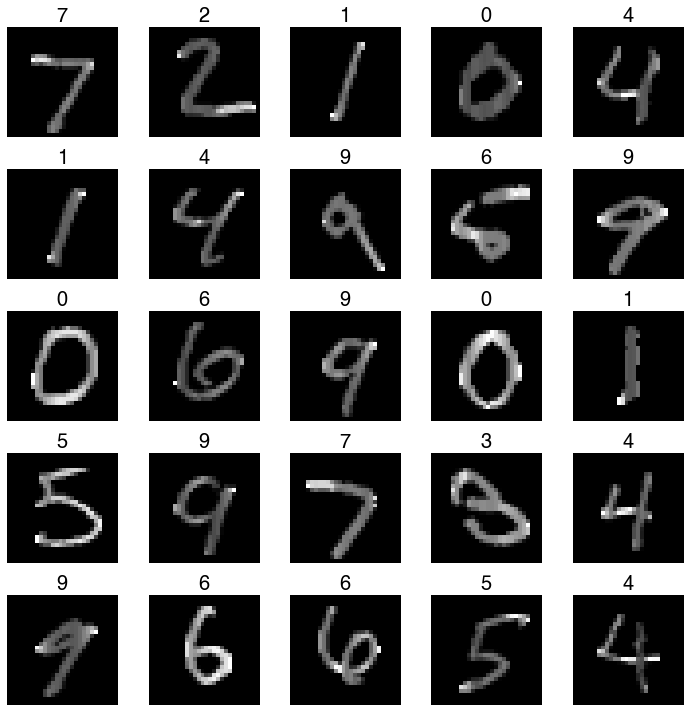

In [14]:
predictions=model.predict([x_test])


print_pred(x_test, predictions)

### Self-implemented

In [12]:
dense1.forward(X_v)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
val_loss = loss_activation.forward(dense2.output, y_v)

predict_self = loss_activation.output

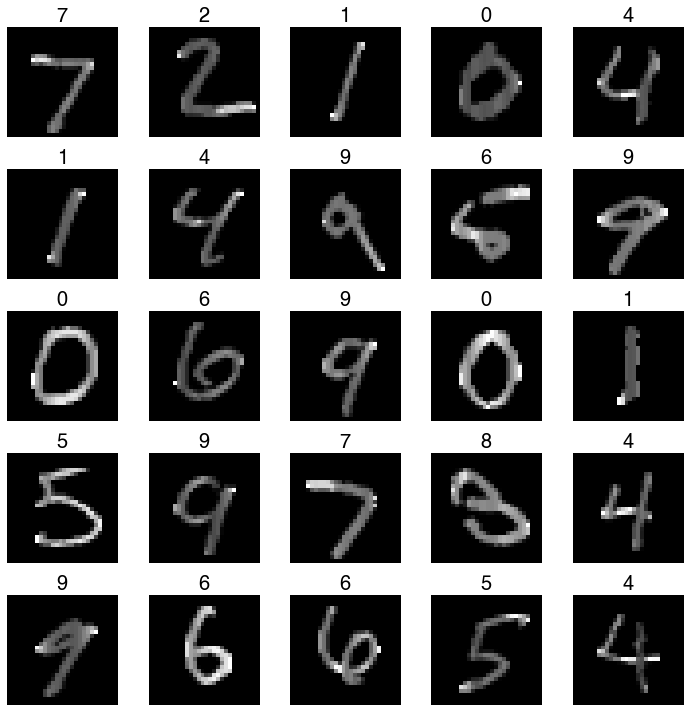

In [13]:
print_pred(X_v, predict_self)


## Conclusion

Tensorflow performed better both in learning phase and predicting phase. This might be due to better structured algorithm on Tensorflow side, mainly optimizer and use of different . 